**Face-Recognition Using Python**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 43kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=0962e9bd9d778b3050e6668227d523e2eb312ad0781cd150faa48e255db3a241
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


**Face Detection**

*For Single Person*



(1117, 670, 3)


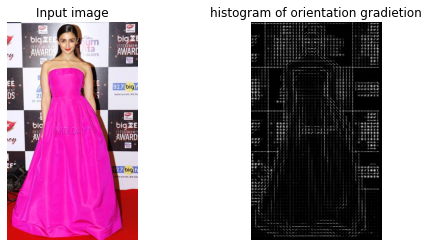

In [14]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2
#reading the image
path='/content/gdrive/My Drive/aliya.jpg'
image=cv2.imread(path)
print(image.shape)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')

#rescale histogram
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('histogram of orientation gradietion')
plt.show()

In [4]:
!nvidia-smi

Wed Aug 12 03:32:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

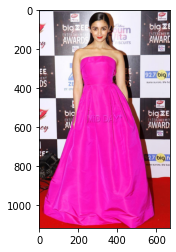

In [15]:
#load jpg image to numpy array
image=cv2.imread(path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [17]:
#find all faces in the image
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Found {} face(s) in input image".format(number_of_faces))

Found 1 face(s) in input image


A face is located at pixel location Top:265, Left:76, Bottom:354,Right:166


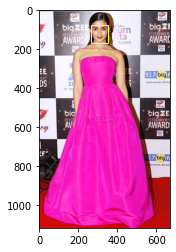

In [18]:
#get the axis handle
plt.imshow(image)
ax=plt.gca()

#iterating for more than one image
for face_location in face_locations:
  #print location of each face
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print("A face is located at pixel location Top:{}, Left:{}, Bottom:{},Right:{}".format(x,y,w,h))

  #lets draw a rectangle box around each face
  rect=Rectangle((x,y),w-x,h-y,fill=False,color='yellow')
  ax.add_patch(rect)
#show output image
plt.show()

*For the multiple faces*

In [10]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

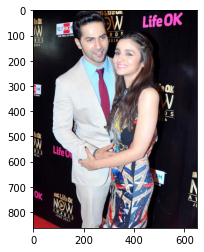

In [19]:
#load jpg image to numpy array
image=cv2.imread('/content/gdrive/My Drive/aliya_varun.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [20]:
#find all faces in the image
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Found {} face(s) in input image ".format(number_of_faces))

Found 2 face(s) in input image 


A face is located at pixel location Top:296, Left:125, Bottom:425,Right:254
A face is located at pixel location Top:199, Left:92, Bottom:306,Right:199


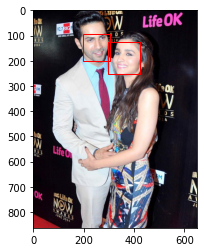

In [21]:
#get the axis handle
plt.imshow(image)
ax=plt.gca()

#iterating for more than one image
for face_location in face_locations:
  #print location of each face
  top,right,bottom,left=face_location
  x,y,w,h=left,top,right,bottom
  print("A face is located at pixel location Top:{}, Left:{}, Bottom:{},Right:{}".format(x,y,w,h))

  #lets draw a rectangle box around each face
  rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)
#show output image
plt.show()

**Face Recognition** 

*For Single Person*



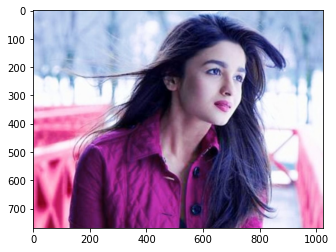

In [37]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

image =cv2.imread("/content/gdrive/My Drive/Priyanka-chopra.jpg")
face_priyanka =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread("/content/gdrive/My Drive/Varun-Dhawan.jpg")
face_varun =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread("/content/gdrive/My Drive/aliya.jpg")
face_demo_aliya =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

face_demo_encoding= face_recognition.face_encodings(face_demo)[0]
face_demo_two_encoding =face_recognition.face_encodings(face_demo_two)[0]
face_demo_three_encoding =face_recognition.face_encodings(face_demo_three)[0]

known_face_encodings = [
    face_demo_encoding,
    face_demo_two_encoding,
    face_demo_three_encoding
]

image= cv2.imread('/content/gdrive/My Drive/unkonown1.jpg')
unkown_image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unkown_image)

unkown_face_encodings = face_recognition.face_encodings(unkown_image)



In [35]:
from scipy.spatial import distance

for unkown_face_encoding in unkown_face_encodings:
    results=[]
    for known_face_encoding in known_face_encodings:
        d=distance.euclidean(known_face_encoding,unkown_face_encoding)
        #print("Distance : ",d)
        results.append(d)
    threshold=0.6
    results=np.array(results) <=threshold
    name="unknown"
    if results[0]:
        name="Priyanka Chopra "
    elif results[1]:
        name="Varun"
    elif results[2]:
        name="Aliya"

    print(f" Found {name} in the Photo!")                

 Found Aliya in the Photo!


*For multiple Person*

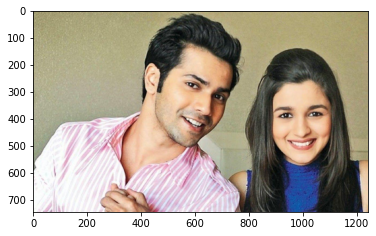

In [38]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

image =cv2.imread("/content/gdrive/My Drive/Priyanka-chopra.jpg")
face_priyanka =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread("/content/gdrive/My Drive/Varun-Dhawan.jpg")
face_varun =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread("/content/gdrive/My Drive/aliya.jpg")
face_demo_aliya =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

face_demo_encoding= face_recognition.face_encodings(face_demo)[0]
face_demo_two_encoding =face_recognition.face_encodings(face_demo_two)[0]
face_demo_three_encoding =face_recognition.face_encodings(face_demo_three)[0]

known_face_encodings = [
    face_demo_encoding,
    face_demo_two_encoding,
    face_demo_three_encoding
]

image= cv2.imread('/content/gdrive/My Drive/unkonwn-3.jpg')
unkown_image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unkown_image)

unkown_face_encodings = face_recognition.face_encodings(unkown_image)


In [39]:
from scipy.spatial import distance

for unkown_face_encoding in unkown_face_encodings:
    results=[]
    for known_face_encoding in known_face_encodings:
        d=distance.euclidean(known_face_encoding,unkown_face_encoding)
        #print("Distance : ",d)
        results.append(d)
    threshold=0.6
    results=np.array(results) <=threshold
    name="unknown"
    if results[0]:
        name="Priyanka Chopra "
    elif results[1]:
        name="Varun"
    elif results[2]:
        name="Aliya"

    print(f" Found {name} in the Photo!")                

 Found Aliya in the Photo!
 Found Varun in the Photo!
